In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [9]:
np.random.seed(42)

true_mu = np.array([25,60])
sigma = np.array([[4,8], [8,25]])
n = 100

data = np.random.multivariate_normal(true_mu, sigma, size = n)

In [10]:
# Prior

prior_mu_mean = np.array([0,0])
prior_mu_cov = np.eye(2) * 100

In [11]:
def log_posterior(mu_mean, sigma):
    rv_likelihood = multivariate_normal(mean = mu_mean, cov = sigma)
    log_likelihood = np.sum(rv_likelihood.logpdf(data))

    rv_prior = multivariate_normal(mean = prior_mu_mean, cov = prior_mu_cov)
    log_prior = rv_prior.logpdf(mu_mean)

    return log_likelihood + log_prior

In [12]:
# Metropolis - Hastings Algorithm

mu_current = np.array([0,0])
proposal_sd = np.array([0.5,0.5])

n_iter = 10000
samples = np.zeros((n_iter,2))

for i in range(n_iter):
    mu_proposed = mu_current + np.random.normal(0,proposal_sd, size = 2)

    log_r = log_posterior(mu_proposed,sigma) - log_posterior(mu_current,sigma)

    if np.log(np.random.rand()) < log_r:
        mu_current = mu_proposed

    samples[i] = mu_current

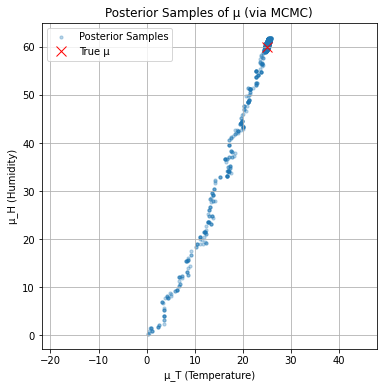

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, s=10, label="Posterior Samples")
plt.plot(true_mu[0], true_mu[1], 'rx', label="True μ", markersize=10)
plt.xlabel("μ_T (Temperature)")
plt.ylabel("μ_H (Humidity)")
plt.title("Posterior Samples of μ (via MCMC)")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()